[Kaggle-7k books dataset
](https://www.kaggle.com/datasets/dylanjcastillo/7k-books-with-metadata)

In [2]:
import pandas as pd
books = pd.read_csv("books.csv")
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Matplotlib is building the font cache; this may take a moment.


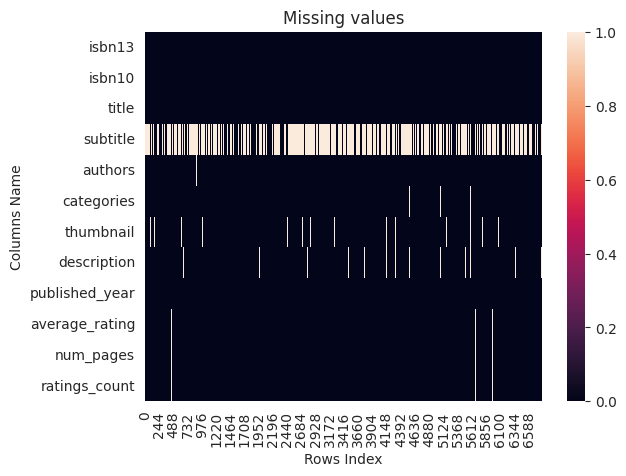

In [4]:
ax = plt.axes()
plt.title("Missing values")
sns.heatmap(books.isna().transpose(), ax=ax, cbar=True)

plt.xlabel("Rows Index")
plt.ylabel("Columns Name")
plt.show()

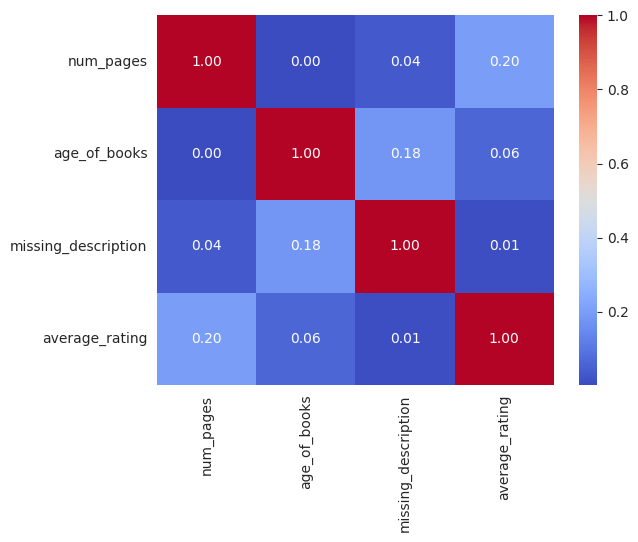

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
books['missing_description'] = np.where(books['description'].isna(), 1, 0)
books['age_of_books'] = 2025 - books['published_year']

Columns_of_interest = ['num_pages', 'age_of_books', 'missing_description', 'average_rating']
correlation_matrix = books[Columns_of_interest].corr()

ax = plt.axes()
sns.heatmap(correlation_matrix, ax=ax, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

Find out the misshing values based on the 2 or more columns

In [6]:
books[(books['description'].isna()) |
      (books['num_pages'].isna()) |
      (books['average_rating'].isna()) |
      (books['published_year'].isna())
    ].shape

(303, 14)

Filter dataframe without any missing value based on 2 or more columns

In [7]:
new_books = books.dropna(subset=['description', 'num_pages', 'average_rating', 'published_year'])
new_books.shape, books.shape

((6507, 14), (6810, 14))

**or**

In [8]:
new_books2 = books[~(books['description'].isna()) &
      ~(books['num_pages'].isna()) &
      ~(books['average_rating'].isna()) &
      ~(books['published_year'].isna())
    ]
new_books2.shape, books.shape

((6507, 14), (6810, 14))

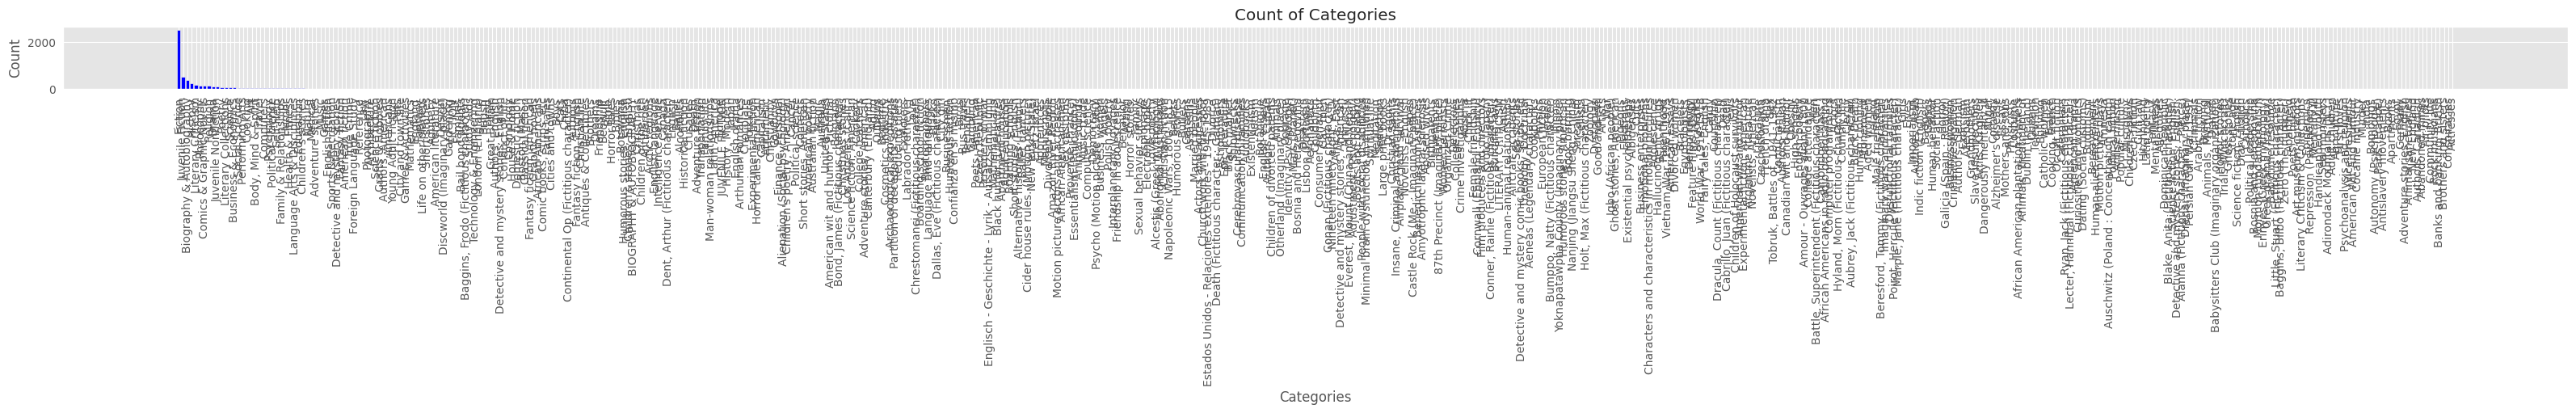

In [9]:
plt.figure(figsize=(40, 1))
plt.style.use('ggplot')
count_cat = new_books['categories'].value_counts().reset_index()
plt.bar(count_cat['categories'], count_cat['count'], color='blue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of Categories')
plt.xticks(rotation=90)
plt.show()

In [10]:
new_books['word_count_desc'] = new_books['description'].str.split().str.len()
new_books['word_count_desc']

/tmp/ipykernel_6299/3621453073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_books['word_count_desc'] = new_books['description'].str.split().str.len()


0       199
1       205
2        14
3        57
4        45
       ... 
6803     63
6804    117
6805    174
6808    245
6809     20
Name: word_count_desc, Length: 6507, dtype: int64

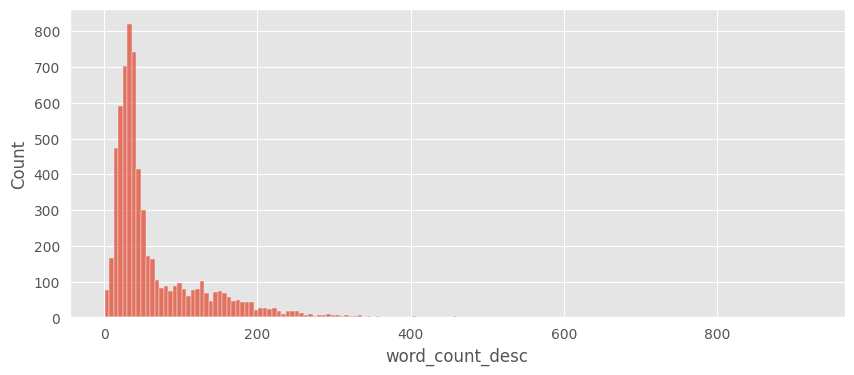

In [11]:
plt.figure(figsize=(10, 4))
sns.histplot(new_books['word_count_desc'])
plt.show()

The above histogram says most description word counts come under 0 to 200. First we can remove minimum word containing description because It's jave no sense.

In [12]:
new_books.loc[new_books['word_count_desc'].between(1,4), 'description']

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

Now we can remove description under 25 words and create new dataframe, because under 25 words descriptions are not a meaningful, so we can remove that rows.

In [13]:
new_books_25_words = new_books[new_books['word_count_desc'] >= 25]
new_books_25_words.shape, books.shape

((5197, 15), (6810, 14))

In [15]:
new_books_25_words['title_and_subtitle'] = (
    np.where(new_books_25_words['subtitle'].isna(), new_books_25_words['title'],
             new_books_25_words[['title', 'subtitle']].astype(str).agg(": ".join, axis=1))
)

/tmp/ipykernel_6299/3214827485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_books_25_words['title_and_subtitle'] = (


In [18]:
new_books_25_words.head(2)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books,word_count_desc,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel


In [19]:
new_books_25_words['tag_description'] = new_books_25_words[['isbn13', 'description']].astype(str).agg(" ".join, axis=1)
new_books_25_words.head(2)

/tmp/ipykernel_6299/4028851943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_books_25_words['tag_description'] = new_books_25_words[['isbn13', 'description']].astype(str).agg(" ".join, axis=1)


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books,word_count_desc,title_and_subtitle,tag_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...


In [20]:
new_books_25_words.drop(['subtitle', 'missing_description', 'age_of_books', 'word_count_desc'], axis=1)\
                    .to_csv('books_cleaned.csv', index=False)